In [4]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier

## Ensemble Learning: Bagging with Naive Bayes

In [5]:
# Data prep 
df = pd.read_csv('FINAL_FINAL.csv')
df = df[['Event number of finishers', 'distance_range', 'age_at_race', 'hours', 'avgtemp', 'Elevation gain']]

df = df[df['distance_range'].isin(['91-120', '71-90'])]


df['distance_range'].value_counts()
df.dropna(inplace= True)
df.isna().value_counts()

#Encoding Label, 0 now corresponds to 50mi race 1 corresponds to 100 km race
y = df['distance_range']
le = LabelEncoder()
y = le.fit_transform(y)

# X is the rest of the DF
X = df.drop('distance_range', axis=1)

#Splitting into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 69)
X_train = X_train.astype(float)


Boosting + Naive Bayes Accuracy: 0.9417582417582417
              precision    recall  f1-score   support

       71-90       0.95      0.93      0.94       918
      91-120       0.93      0.95      0.94       902

    accuracy                           0.94      1820
   macro avg       0.94      0.94      0.94      1820
weighted avg       0.94      0.94      0.94      1820



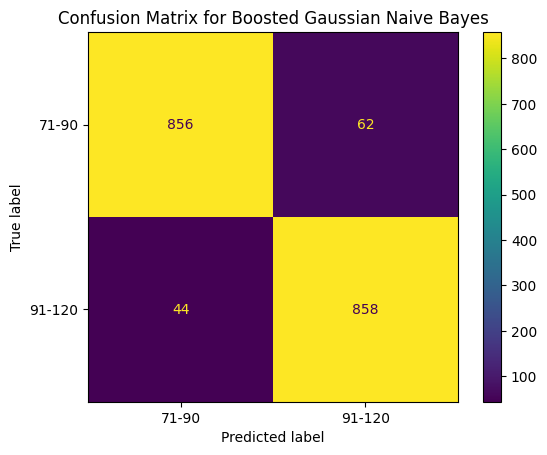

In [10]:
# Base model is Gaussian Naive Bayes
nb = GaussianNB()

# Boosting
boosting_model = AdaBoostClassifier(estimator=nb, n_estimators=20, random_state=69)
boosting_model.fit(X_train, y_train)

# Predict
y_pred_boost = boosting_model.predict(X_test)

# Evaluation
print("Boosting + Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_boost))
print(classification_report(y_test, y_pred_boost, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_boost, display_labels=le.classes_)
plt.title("Confusion Matrix for Boosted Gaussian Naive Bayes")
plt.show()